In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from numba import njit
import IPython
from pydub import AudioSegment# Load files
import wave# Open wav file and read frames as bytes
import os

%matplotlib inline

e:\Studium\Semester8\Projekt\workspace\venv\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
KRACHEN = os.path.join('data', 'Krachen', 'Krachen1.wav')
NOT_KRACHEN = os.path.join('data', 'not_Krachen', 'Hintergrund1.wav')
HAMMER_1 = os.path.join('data', 'Ultraschall_bearbeitet', 'Test_Hammer_1.wav')
HAMMER_2 = os.path.join('data', 'Ultraschall_ampels', 'Test_Hammer_2.wav')
TEST_IO = os.path.join('data', 'Ultraschall_ampels', 'TestIO_1.wav')

TEST_FOLDER_1 = os.path.join('data', 'Test1')
TEST_FOLDER_2 = os.path.join('data', 'Test2')
TEST_FOLDER_3 = os.path.join('data', 'Test3')
TEST_FOLDER_4 = os.path.join('data', 'Test4')

ULTRASHALL_FOLDER = os.path.join('data', 'Ultrashall_ampels')
STEREO_FOLDER = os.path.join('data', 'Wav Daniel')

In [61]:
audio_segment = AudioSegment.from_file(HAMMER_1)# Print attributes
print(f"Channels: {audio_segment.channels}")
print(f"Sample width: {audio_segment.sample_width}")
print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
print(f"Frame width: {audio_segment.frame_width}")
print(f"Length (ms): {len(audio_segment)}")
print(f"Frame count: {audio_segment.frame_count()}")
print(f"Intensity: {audio_segment.dBFS}")

Channels: 1
Sample width: 2
Frame rate (sample rate): 1000000
Frame width: 2
Length (ms): 4984
Frame count: 4983616.0
Intensity: -17.424166982319782


In [48]:

audio_segment = AudioSegment.from_file(KRACHEN)# Print attributes
print(f"Channels: {audio_segment.channels}")
print(f"Sample width: {audio_segment.sample_width}")
print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
print(f"Frame width: {audio_segment.frame_width}")
print(f"Length (ms): {len(audio_segment)}")
print(f"Frame count: {audio_segment.frame_count()}")
print(f"Intensity: {audio_segment.dBFS}")

Channels: 1
Sample width: 2
Frame rate (sample rate): 44100
Frame width: 2
Length (ms): 260
Frame count: 11459.0
Intensity: -9.363501351510768


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-1970 -2043 -2086 ...  -315  -588  -799]


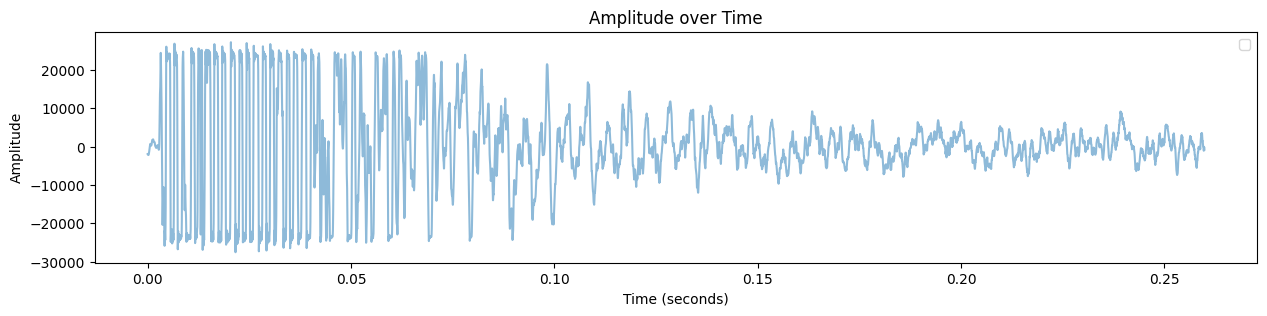

In [6]:
sf_filewave = wave.open(KRACHEN, 'r')
signal_sf = sf_filewave.readframes(-1)# Convert audio bytes to integers
soundwave_sf = np.frombuffer(signal_sf, dtype='int16')# Get the sound wave frame rate
print(soundwave_sf)
framerate_sf = sf_filewave.getframerate()# Find the sound wave timestamps
time_sf = np.linspace(start=0,
                    stop=len(soundwave_sf)/framerate_sf,
                    num=len(soundwave_sf))# Set up plot
f, ax = plt.subplots(figsize=(15, 3))# Setup the title and axis titles
plt.title('Amplitude over Time')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')# Add the audio data to the plot
ax = plt.plot(time_sf, soundwave_sf, alpha=0.5)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


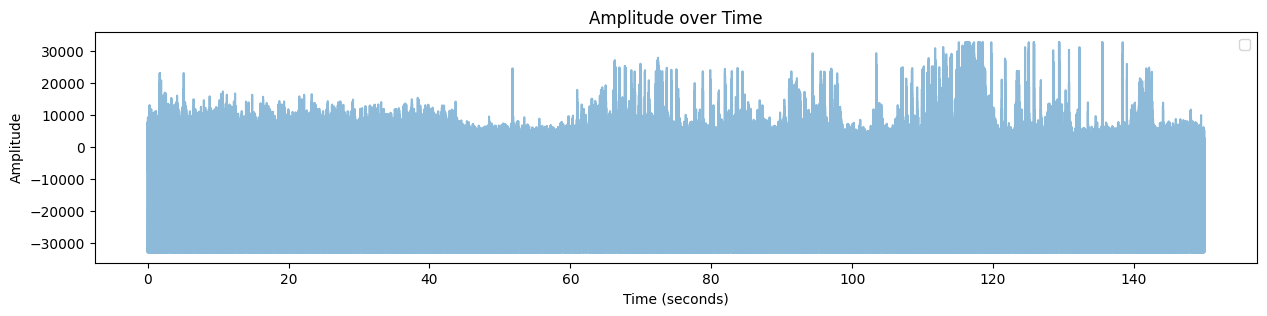

In [9]:
sf_filewave = wave.open('Bruch1000kg_int.wav', 'r')
signal_sf = sf_filewave.readframes(-1)# Convert audio bytes to integers
soundwave_sf = np.frombuffer(signal_sf, dtype='int16')# Get the sound wave frame rate
framerate_sf = sf_filewave.getframerate()# Find the sound wave timestamps
time_sf = np.linspace(start=0,
                    stop=len(soundwave_sf)/framerate_sf,
                    num=len(soundwave_sf))# Set up plot
f, ax = plt.subplots(figsize=(15, 3))# Setup the title and axis titles
plt.title('Amplitude over Time')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')# Add the audio data to the plot
ax = plt.plot(time_sf, soundwave_sf, alpha=0.5)
plt.legend()
plt.show()

In [9]:
audio_data = KRACHEN
bruch = 'Bruch1000kg_int.wav'
x, sr = librosa.load(audio_data)
x_bruch, sr_bruch = librosa.load(bruch)

# x3 = x3[10:].copy()
# print(x1.shape, x2.shape, x3.shape, x_bruch.shape)
# print(np.where(np.isin(x_bruch, x3) == True))
# print(x2)
# print(x_bruch[44780:44780 + len(x2)])

# sub_x2 = x_bruch[44780:44780 + len(x2)]
# print(x2)

In [65]:
@njit
def search_array(arr, subarr):
    # get the lengths of the arrays
    n = len(arr)
    m = len(subarr)
    
    # if the subarray is longer than the main array, it can't be a subarray
    if m > n:
        print(f"m>n ({m}>{n})")
        return None
    
    # loop through the main array
    for i in range(n - m + 1):
        # print(arr[i:i+m], subarr)
        # check if the subarray matches the slice of the main array starting at index i
        if np.array_equal(arr[i:i+m], subarr):
            return i
    
    # if the subarray was not found, return None
    return None

In [18]:
print(search_array(np.around(x_bruch, 2), np.around(x3[:50],2)))

730692


[-0.04488498 -0.06838079 -0.06239453 ... -0.00565947 -0.01179898
 -0.01729206]


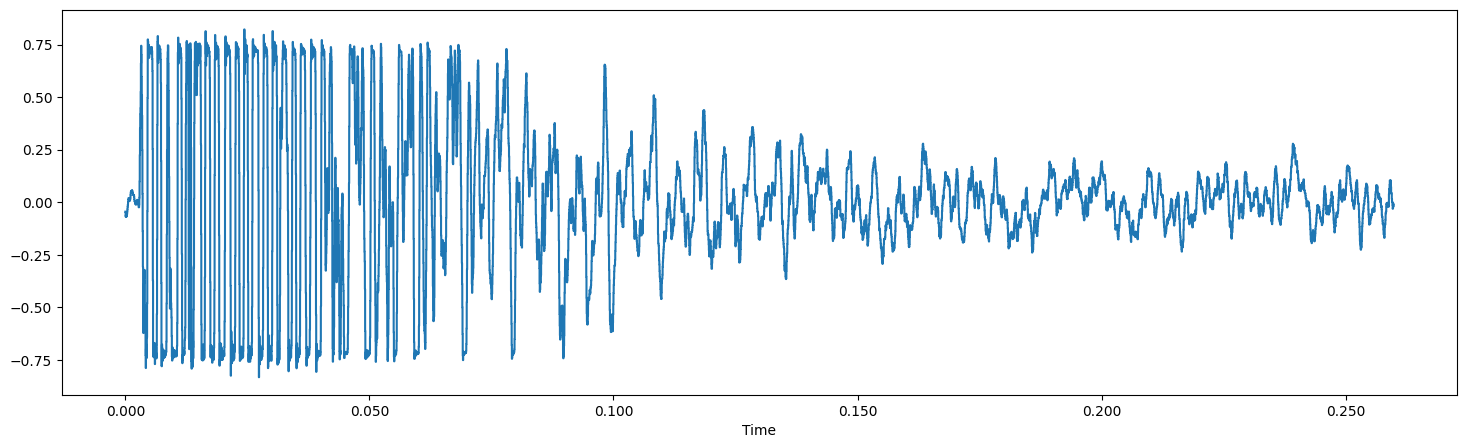

In [10]:
plt.figure(figsize=(18,5))
print(x)
# librosa.display.waveshow(sub_x2, sr=sr_bruch)
librosa.display.waveshow(x, sr=sr)

splitter = 730682 
# print(splitter)
#librosa.display.waveshow(x_bruch[splitter:splitter + 50], sr=sr)
#print(np.around(x[:50], 2))
#print(np.around(x_bruch[splitter:splitter+50],2))

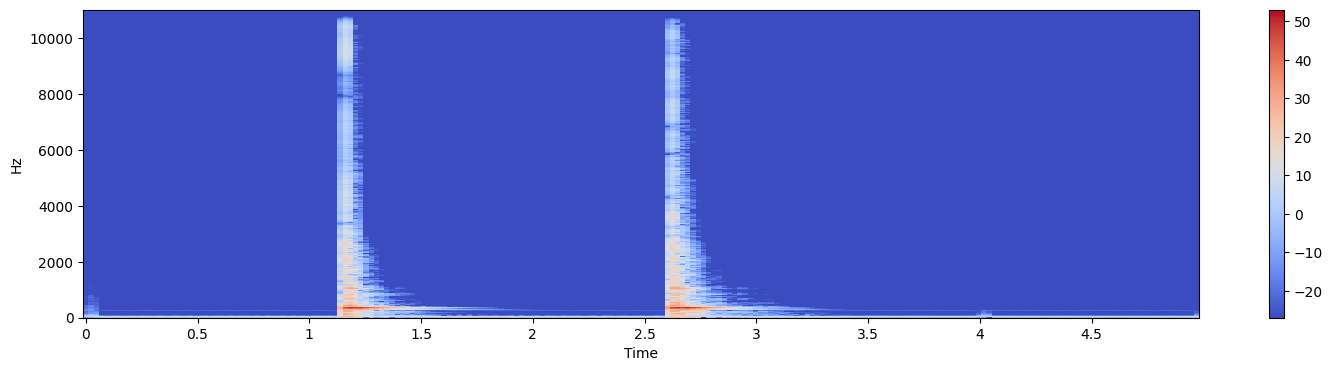

In [68]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(18,4))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
# X2 = librosa.stft(x3)
# Xdb2 = librosa.amplitude_to_db(abs(X2))
# plt.figure(figsize=(18,4))
# librosa.display.specshow(Xdb2, sr=sr, x_axis='time', y_axis='hz')
# plt.colorbar()

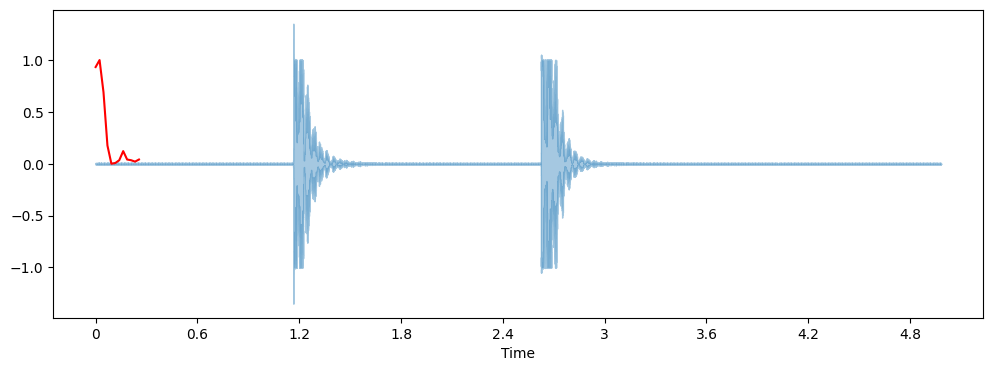

In [69]:
from sklearn import preprocessing

spectral_rolloff = librosa.feature.spectral_rolloff(y=x3+0.01, sr=sr3)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(x, sr=sr, alpha=0.4)


def normalize(x, axis=0):
    return preprocessing.minmax_scale(x, axis=axis)

frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)

plt.plot(t, normalize(spectral_rolloff), color='r')

In [24]:

IPython.display.Audio(data=x_bruch[splitter:splitter + 1*len(x3)], rate=sr3)


In [25]:
IPython.display.Audio(data=x3, rate=sr3)

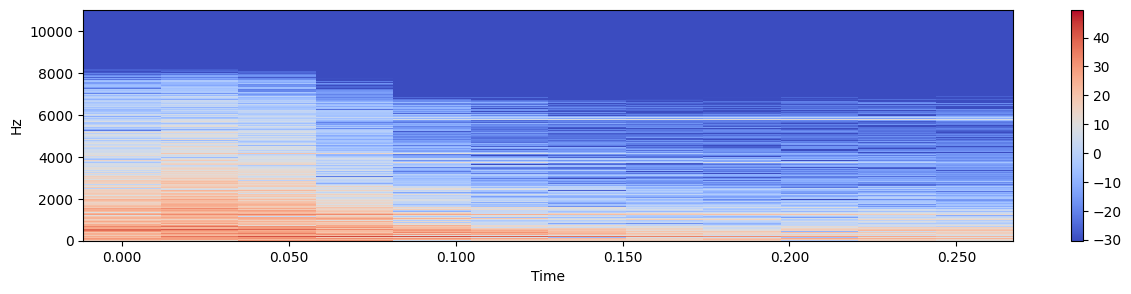

In [26]:
x, sr = librosa.load(KRACHEN)# Spectrogram of frequency
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 3))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

[Text(0.5, 1.0, 'log Power spectrogram')]

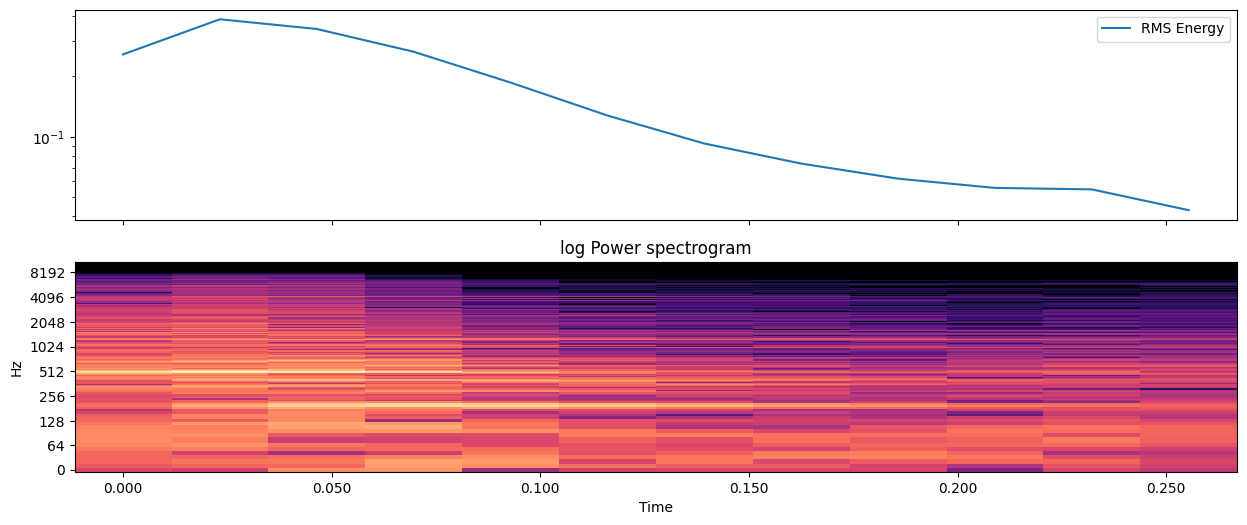

In [27]:
y, sr = librosa.load(KRACHEN)# Get RMS value from each frame's magnitude value
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)# Plot the RMS energy
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                        y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

[Text(0.5, 1.0, 'log Power spectrogram')]

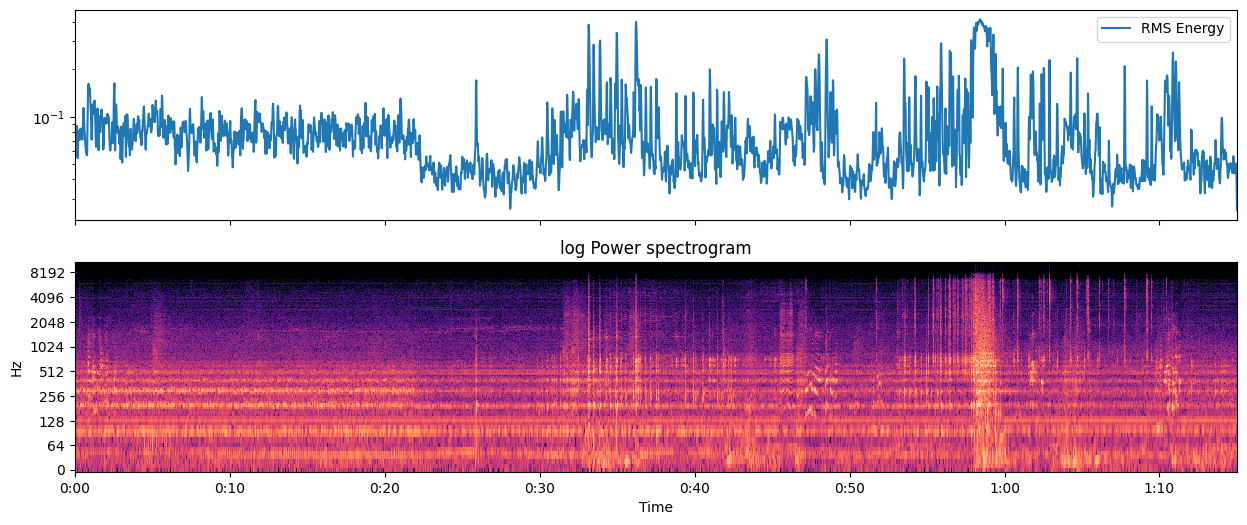

In [28]:
y, sr = librosa.load('Bruch1000kg_int.wav')# Get RMS value from each frame's magnitude value
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)# Plot the RMS energy
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                        y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

Zero crossing rate: 291


Text(0.5, 1.0, 'Krachen3')

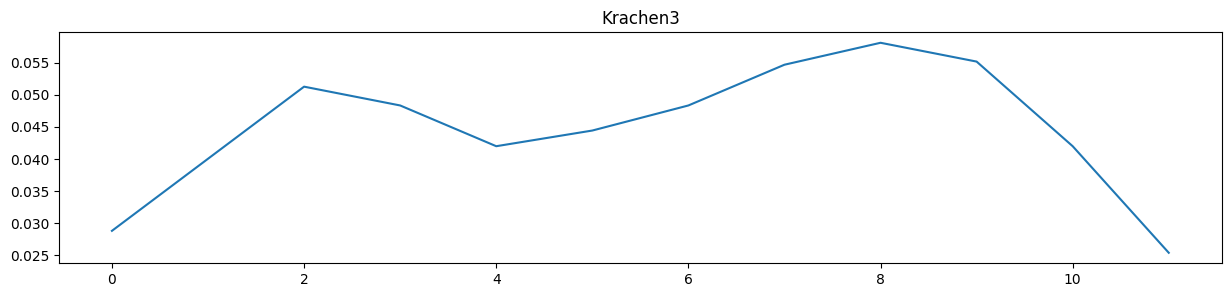

In [30]:
y, sr = librosa.load(KRACHEN)
zcrs = librosa.feature.zero_crossing_rate(y)
print(f"Zero crossing rate: {sum(librosa.zero_crossings(y))}")
plt.figure(figsize=(15, 3))
plt.plot(zcrs[0])
plt.title('Krachen3')

Zero crossing rate: 64938


Text(0.5, 1.0, 'Bruch 1000 kg')

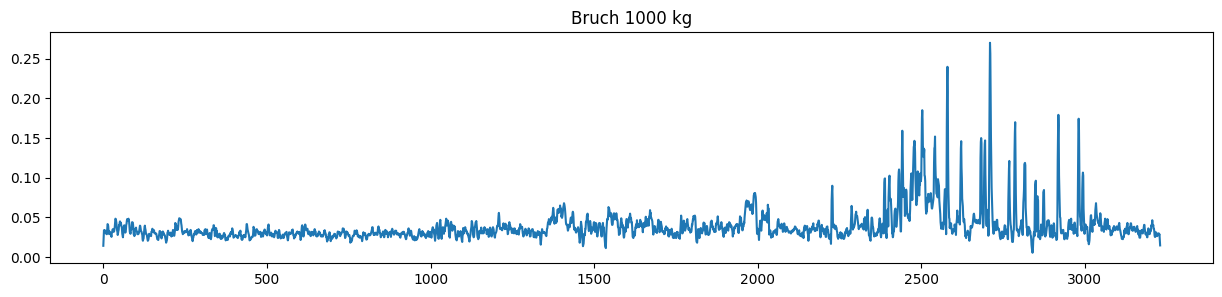

In [31]:
y, sr = librosa.load('Bruch1000kg_int.wav')
zcrs = librosa.feature.zero_crossing_rate(y)
print(f"Zero crossing rate: {sum(librosa.zero_crossings(y))}")
plt.figure(figsize=(15, 3))
plt.plot(zcrs[0])
plt.title('Bruch 1000 kg')

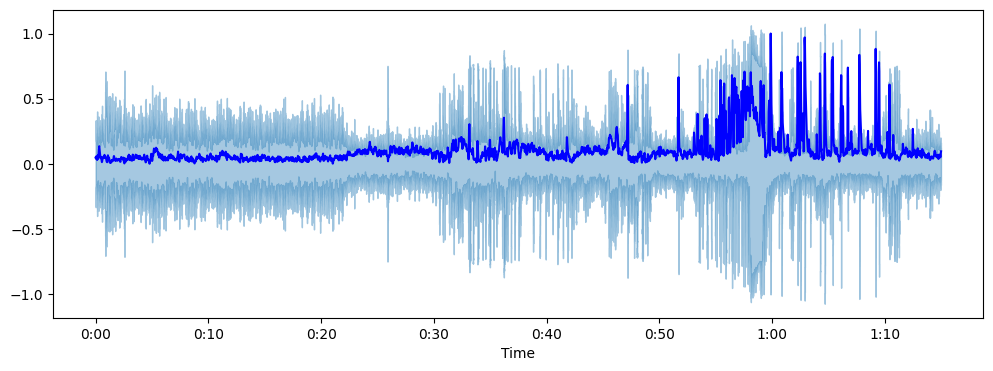

In [32]:
import sklearn
import librosa
from sklearn import preprocessing


y, sr = librosa.load('Bruch1000kg_int.wav')
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
# spectral_centroids.shape

plt.figure(figsize=(12,4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

def normalize(x, axis=0):
    return preprocessing.minmax_scale(x, axis=axis)

librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

<Figure size 640x480 with 0 Axes>

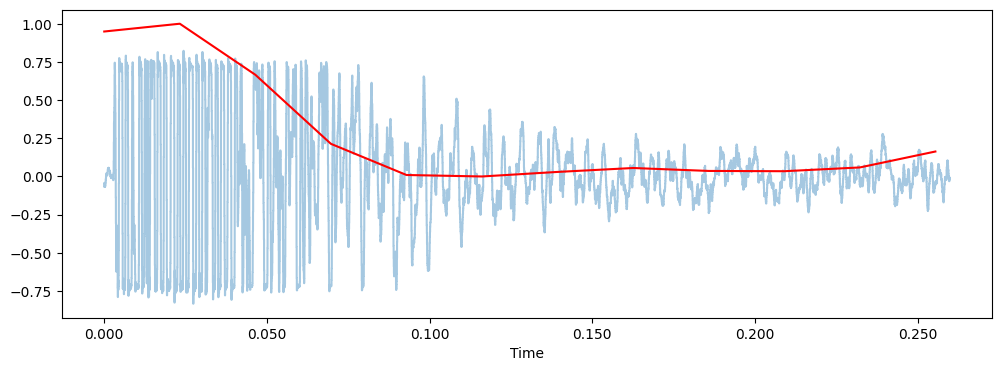

In [35]:
import sklearn
import librosa
from sklearn import preprocessing

y, sr = librosa.load(KRACHEN)
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
# spectral_centroids.shape

plt.clf()
plt.figure(figsize=(12,4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

def normalize(x, axis=0):
    return preprocessing.minmax_scale(x, axis=axis)

librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

(3231,)


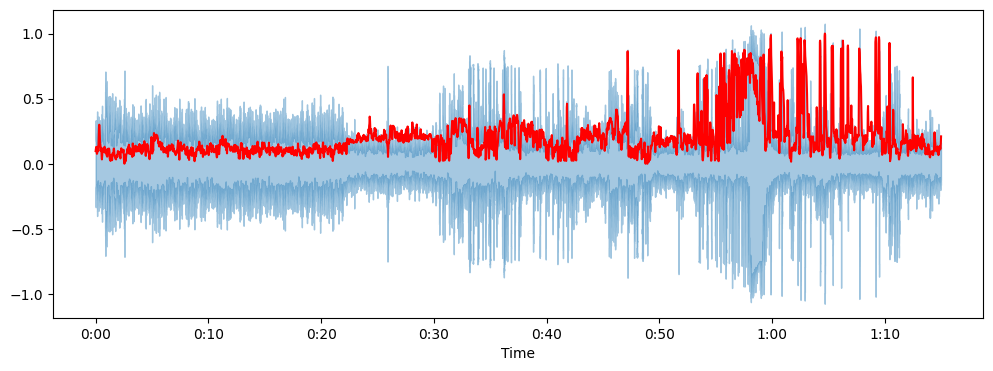

In [36]:
import librosa

y, sr = librosa.load('Bruch1000kg_int.wav')
spectral_rolloff = librosa.feature.spectral_rolloff(y=y+0.01, sr=sr)[0]
print(spectral_rolloff.shape)
plt.figure(figsize=(12, 4))

frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)
librosa.display.waveshow(y=y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

In [29]:
spectral_rolloff

array([1195.09277344, 1291.9921875 , 1367.35839844, ..., 1345.82519531,
       1518.09082031, 1819.55566406])

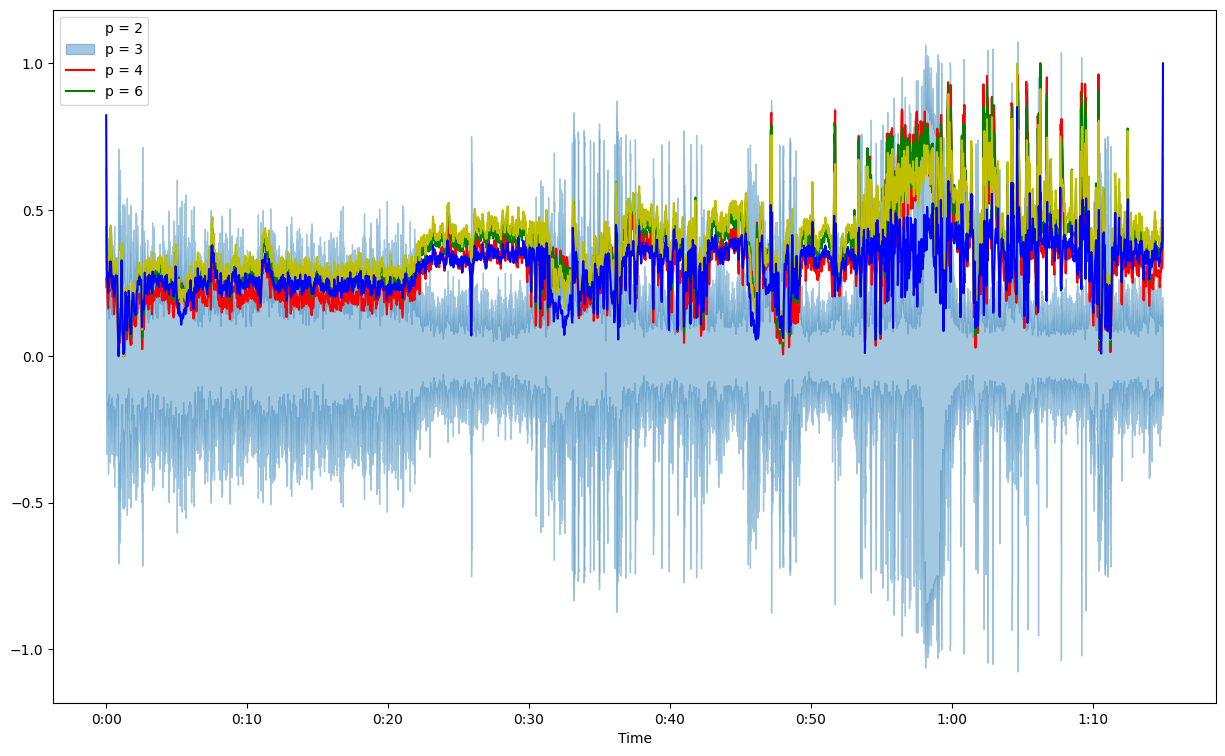

In [37]:

x, sr = librosa.load('Bruch1000kg_int.wav')

spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=4)[0]
spectral_bandwidth_6 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=6)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.plot(t, normalize(spectral_bandwidth_6), color='b')
plt.legend(('p = 2', 'p = 3', 'p = 4', 'p = 6'))



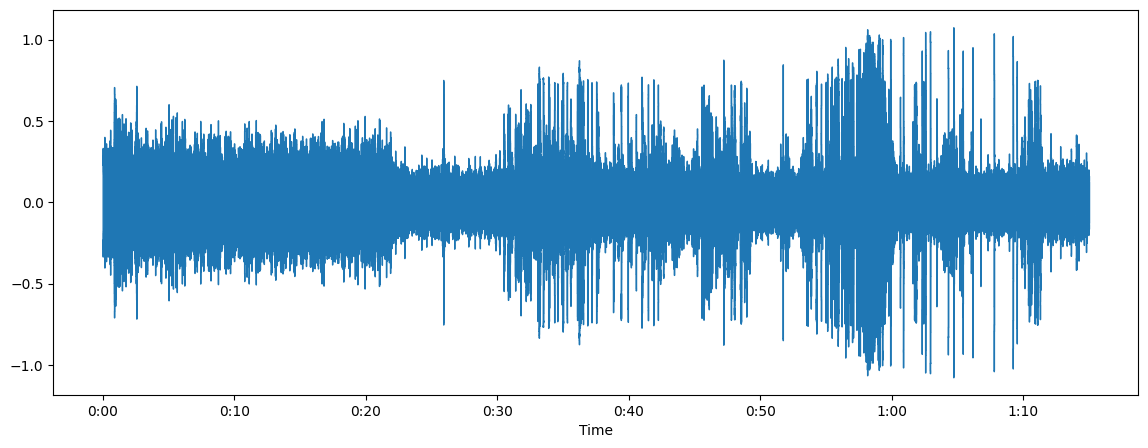

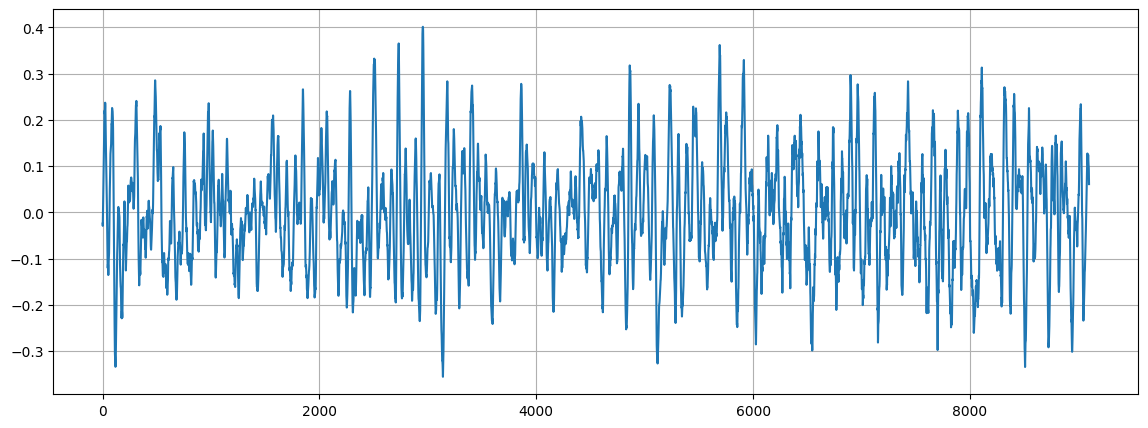

In [38]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
# Zooming in
n0 = 0
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [39]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

301


[-0.04488498 -0.06838079 -0.06239453 ... -0.00565947 -0.01179898
 -0.01729206] 22050


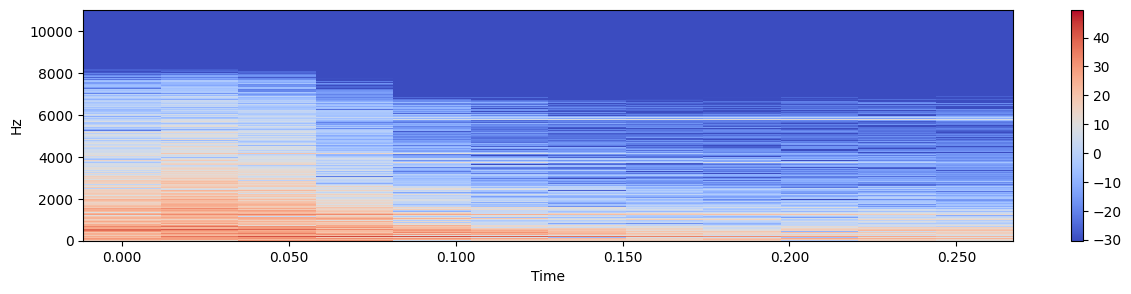

In [72]:
import numpy as np
x, sr = librosa.load(KRACHEN)# Spectrogram of frequency
data = np.
print(x,sr)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 3))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()